In [399]:
#Part 1-A

#Calculate the average growth of states for the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)'. Compare the calculated values and plot them for the states. Make appropriate transformations, if necessary, to plot the data. Report the average growth rates of the various states:

#Which states have been growing consistently fast, and which ones have been struggling?


import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np

#Reading CSV Files excepty year '2016-17'

df=pd.read_csv('Data I-A.csv')

#Removing the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.


df=df[df.Duration!='2016-17']

#Data quality check

df.describe()
df.isna().sum(axis=0)

#Data correction

df=df.dropna(axis=1, how='all')
df=df[6:]
df.fillna(df.mean(),inplace=True)

#Average calculation for All India data

df_All_india=df.drop(['Items  Description','Duration'], axis=1)
Avg_line=df_All_india['All_India GDP'].mean()

#Calculating the average growth of states for the duration 2013-14, 2014-15 and 2015-16

df=df.drop(['Items  Description','Duration','All_India GDP'], axis=1)
average = df.mean()
average.name = 'average'
df = df.append(average)
df=df.transpose()
df=df.sort_values(by=['average'], ascending=False).round(2)



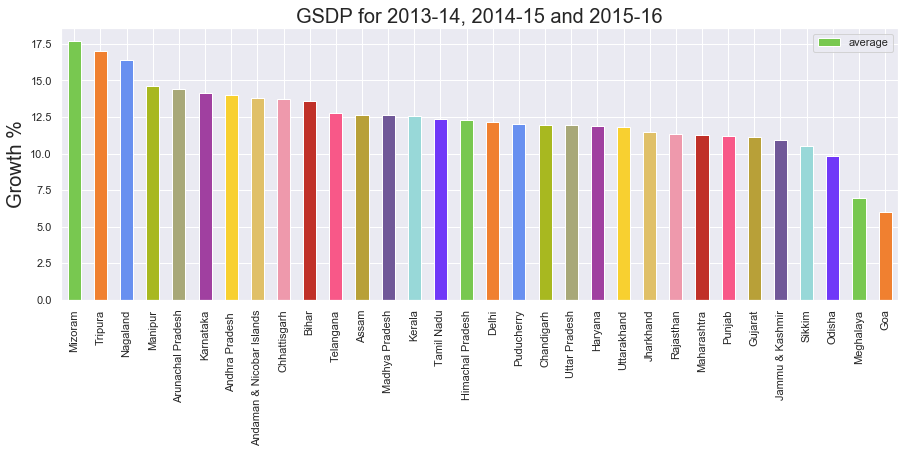

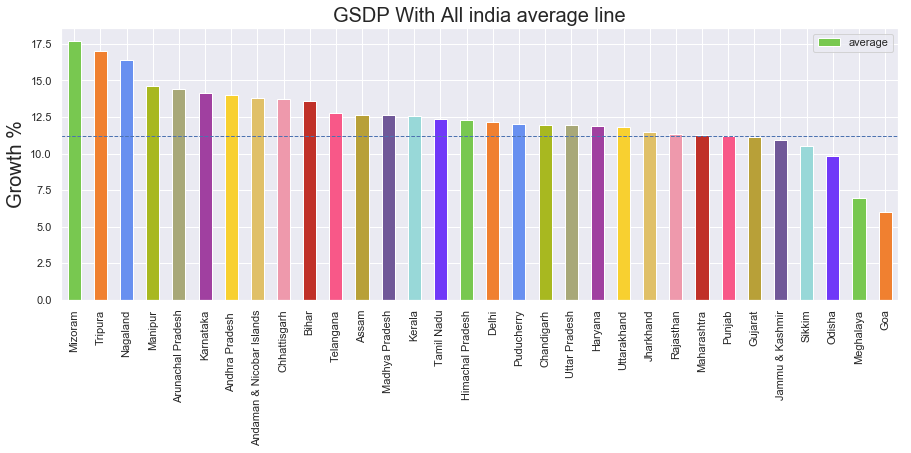

In [400]:
#plotting graph for all states for the duration 2013-14, 2014-15 and 2015-16

df.plot(figsize=(15,5),y='average',color=['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0',
'#F8D030','#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8'],kind='bar')
#df.plot(y='average',color=['r', 'g', 'b',],kind='bar')
plt.ylabel('Growth %',fontsize=20)
plt.title('GSDP for 2013-14, 2014-15 and 2015-16',fontsize=20)
plt.show()


#Curiosity exercise: What has been the average growth rate of your home state, and how does it compare to the national average over this duration?

#plotting graph for all states for the duration 2013-14, 2014-15 and 2015-16 with average line

df.plot(figsize=(15,5),y='average',color=['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0',
'#F8D030','#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8'],kind='bar').axhline( y=Avg_line,color='b', linestyle='dashed', linewidth=1)
#df.plot(y='average',color=['r', 'g', 'b',],kind='bar')
plt.ylabel('Growth %',fontsize=20)
plt.title('GSDP With All india average line',fontsize=20)
plt.show()




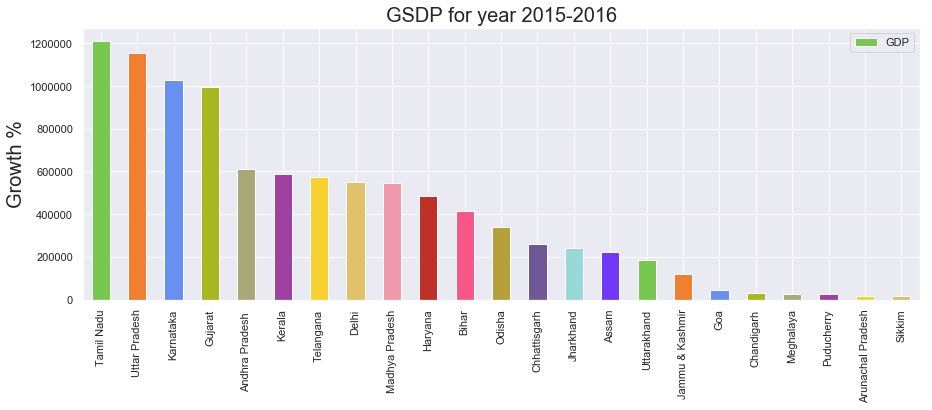

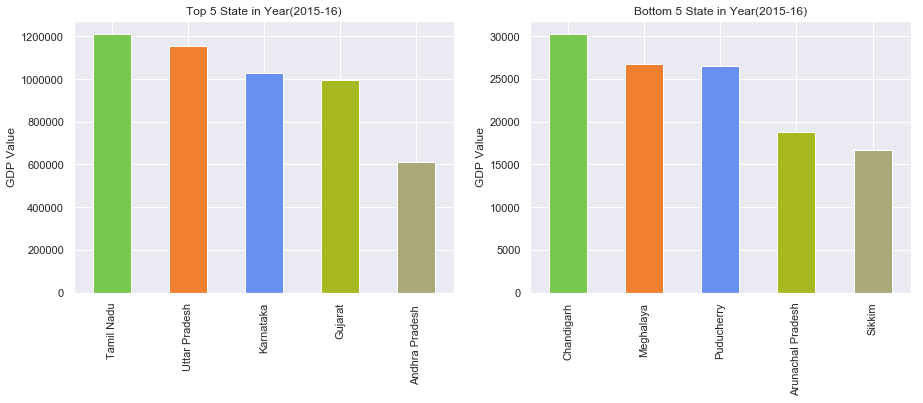

In [401]:
#Part 1-A for year 2015-16

#Plot the total GDP of the states for the year 2015-16:

#Identify the top 5 and the bottom 5 states based on total GDP.

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np

#Reading Csv file for year 2015-16


new_df=pd.read_csv('Data I-A.csv')
new_df=new_df[new_df.Duration=='2015-16']



#Data correction
new_df=new_df.dropna(axis=1, how='all')
new_df=new_df[0:1]
new_df=new_df.drop(['Items  Description','Duration','All_India GDP'], axis=1)

#Preparing data for plotting graph

new_df=new_df.transpose()
new_df.columns=['GDP']
new_df=new_df.sort_values(by=['GDP'], ascending=False).round(2)

#All state Graph plotting for 2015-2016 

new_df.plot(figsize=(15,5),y='GDP',color=['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0',
'#F8D030','#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8'],kind='bar').axhline( y=Avg_line,color='b', linestyle='dashed', linewidth=1)
#df.plot(y='average',color=['r', 'g', 'b',],kind='bar')
plt.ylabel('Growth %',fontsize=20)
plt.title('GSDP for year 2015-2016',fontsize=20)
plt.show()




#Filtering and plotting graph for Top 5 state
new_head_5=new_df.head(5)

fig, axes = plt.subplots(figsize=(8,10),nrows=1, ncols=2)

new_head_5["GDP"].plot(ax=axes[0],figsize=(15,5),y='GDP',color=['#78C850','#F08030','#6890F0','#A8B820','#A8A878'],kind='bar')
axes[0].set_ylabel('GDP Value')
axes[0].set_title('Top 5 State in Year(2015-16)')


#Filtering and plotting graph for Bottom 5 state
new_tail_5=new_df.tail(5)

new_tail_5["GDP"].plot(ax=axes[1],figsize=(15,5),y='GDP',color=['#78C850','#F08030','#6890F0','#A8B820','#A8A878'],kind='bar')
axes[1].set_ylabel('GDP Value')
axes[1].set_title('Bottom 5 State in Year(2015-16)')

plt.show()



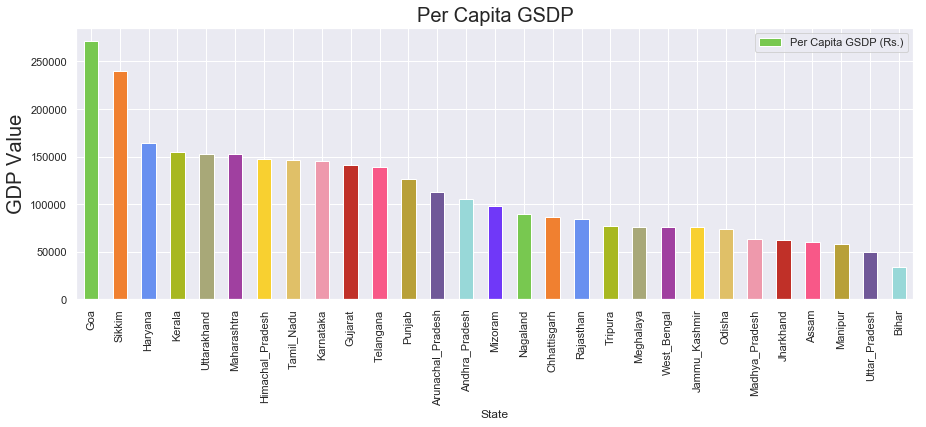

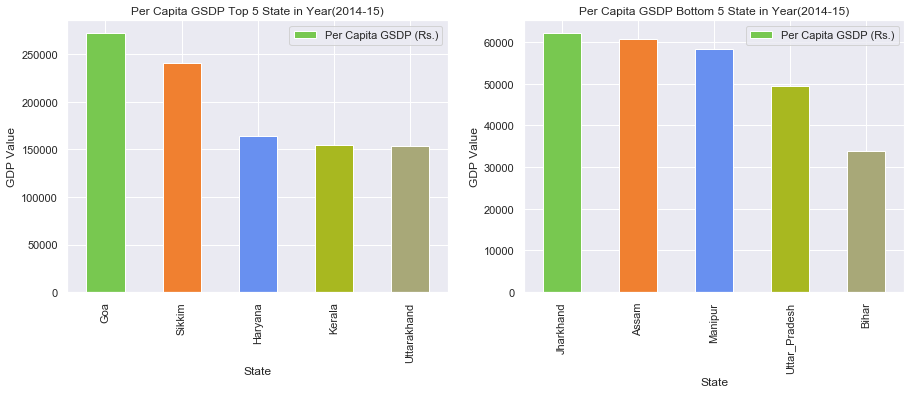

In [402]:
#Part 1-B

#Plot the GDP per capita for all the states.
#Identify the top 5 and the bottom 5 states based on the GDP per capita.

import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Reading and combining all the state and UT data

path = 'Data 1B'
all_files = glob.glob(path + "/*.csv")

li = []
#file_list=[]

for filename in all_files:
    df = pd.read_csv(filename,encoding='ISO-8859-1')
    df=df[['Item','2014-15']]
    df=df.T
    new_header=df.iloc[0]
    df=df[1:]
    df.columns=new_header
    df['State']=filename.split('-')[1]
    li.append(df)
    #file_list.append(filename)
    
df_All = pd.concat(li, axis=0, ignore_index=True,sort=False)

#Removing UT records

State_not_required=['Andaman_Nicobar_Islands','Delhi','Chandigarh','Puducherry']

df_All_required=df_All.loc[~df_All['State'].isin(State_not_required)] 

df_All_required.to_csv("file_name.csv",sep=",")

#Filtering required data set

df=df_All_required[['State','Per Capita GSDP (Rs.)']]

df=df.sort_values(by=['Per Capita GSDP (Rs.)'], ascending=False).round(2)


#Plotting graph for all combined state data

df.plot(figsize=(15,5),x='State',y='Per Capita GSDP (Rs.)',color=['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0',
'#F8D030','#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8'],kind='bar')
#df.plot(y='average',color=['r', 'g', 'b',],kind='bar')
plt.ylabel('GDP Value',fontsize=20)
plt.title('Per Capita GSDP',fontsize=20)
plt.show()



#Filtering and plotting graph for Top 5 state

new_head_5=df.head(5)

fig, axes = plt.subplots(figsize=(8,10),nrows=1, ncols=2)

new_head_5.plot(ax=axes[0],figsize=(15,5),x='State',y='Per Capita GSDP (Rs.)',color=['#78C850','#F08030','#6890F0','#A8B820','#A8A878'],kind='bar')
axes[0].set_ylabel('GDP Value')
axes[0].set_title('Per Capita GSDP Top 5 State in Year(2014-15)')

#Filtering and plotting graph for Bottom 5 state


new_tail_5=df.tail(5)
new_tail_5.plot(ax=axes[1],figsize=(15,5),x='State',y='Per Capita GSDP (Rs.)',color=['#78C850','#F08030','#6890F0','#A8B820','#A8A878'],kind='bar')
axes[1].set_ylabel('GDP Value')
axes[1].set_title('Per Capita GSDP Bottom 5 State in Year(2014-15)')

plt.show()



In [403]:
#Find the ratio of the highest per capita GDP to the lowest per capita GDP.

#Top to bottom  per capita GDP ratio calculation

Ratio=np.round(df['Per Capita GSDP (Rs.)'].max()/df['Per Capita GSDP (Rs.)'].min())

print('Ratio of the highest per capita GDP to the lowest per capita GDP =',Ratio)


Ratio of the highest per capita GDP to the lowest per capita GDP = 8.0


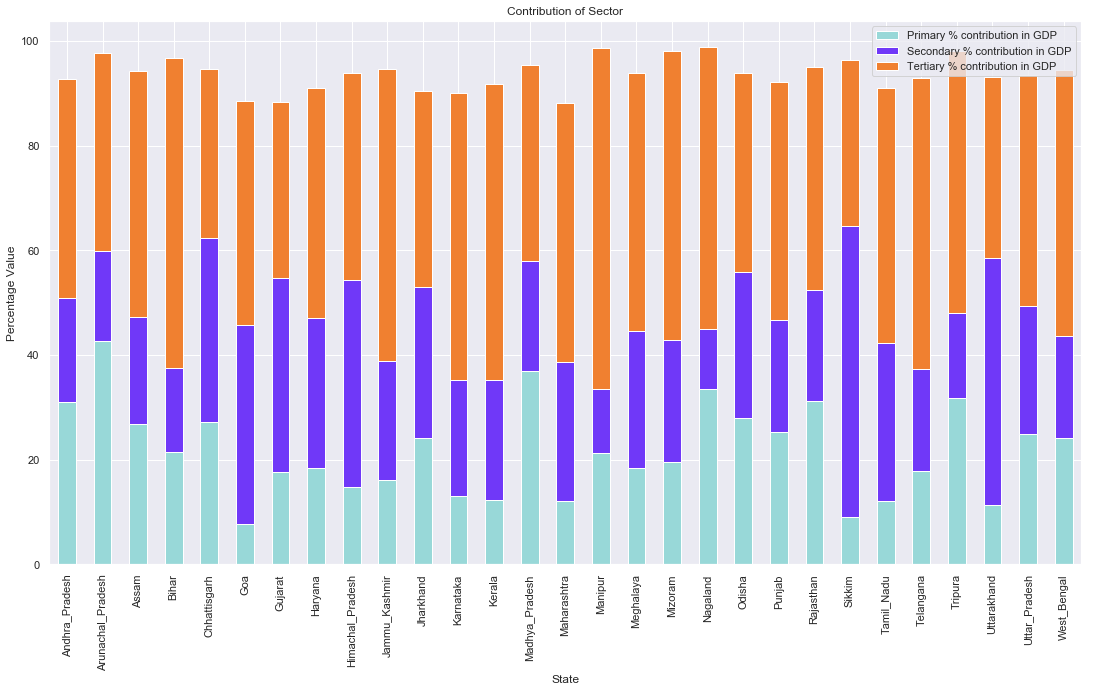

In [404]:
#Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.

import warnings
warnings.filterwarnings('ignore')

#Filtering all require column for calculation
df=df_All_required[['Primary','Secondary','Tertiary','Gross State Domestic Product','State']]

#Calculating contribution percentage

df['Primary % contribution in GDP']=(df['Primary']/df['Gross State Domestic Product'])*100
df['Secondary % contribution in GDP']=(df['Secondary']/df['Gross State Domestic Product'])*100
df['Tertiary % contribution in GDP']=(df['Tertiary']/df['Gross State Domestic Product'])*100

#Creating new datafram with calculted value

new_df=df[['Primary % contribution in GDP','Secondary % contribution in GDP','Tertiary % contribution in GDP','State']]

#Stacked Graph plotting for percentage contribution

ax = new_df.plot(x='State',color=['#98D8D8','#7038F8','#F08030'],kind='bar', stacked=True, figsize=(18.5, 10))
ax.set_ylabel('Percentage Value')
ax.set_title('Contribution of Sector')
plt.show()


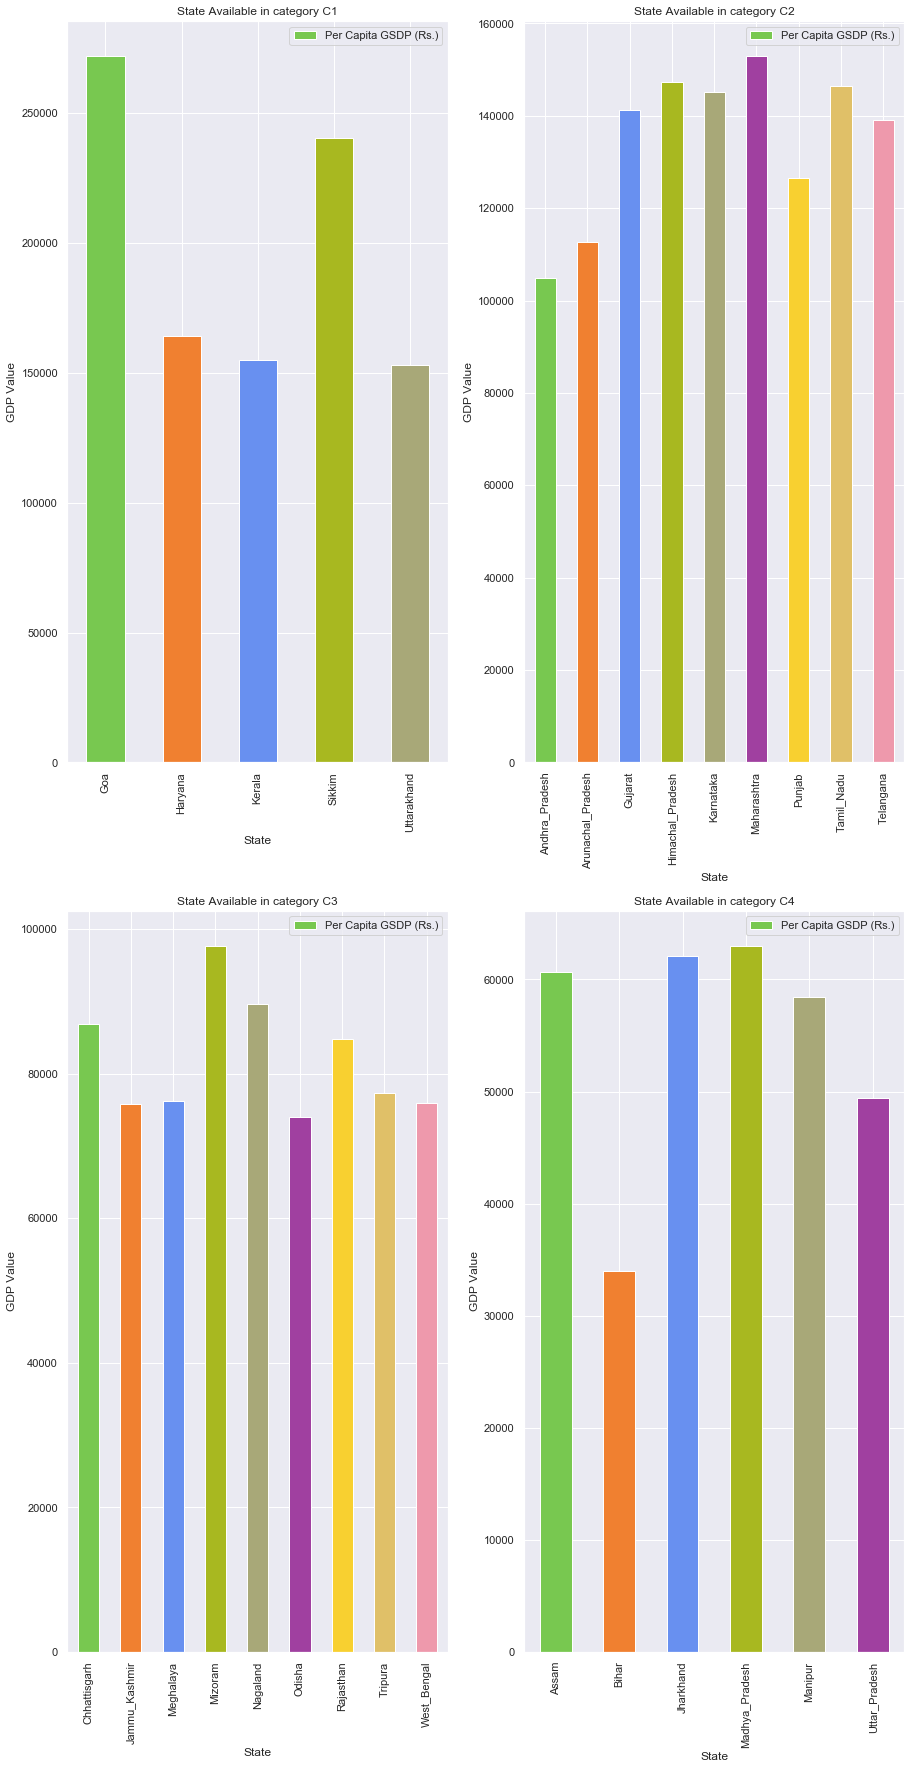

In [405]:
#Part 1-B 

#Plot the contribution of the sub-sectors as a percentage of the GSDP of each category.  


#Creating data frame to do required calculation

Sub_Group=['State','Per Capita GSDP (Rs.)','Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services','Construction',
'Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services',
'Real estate, ownership of dwelling & professional services','Public administration','Other services','Gross State Domestic Product']

df=df_All_required[Sub_Group]

#Setting proper index

df.index = range(len(df))

#Dividing into category for states

a=len(df['Per Capita GSDP (Rs.)'])             

Tag=[]

for i in range(0,a):
    if 0<df['Per Capita GSDP (Rs.)'][i]<=int(df['Per Capita GSDP (Rs.)'].quantile([0.20])):
        Tag.append('C4')
    elif int(df['Per Capita GSDP (Rs.)'].quantile([0.20]))<df['Per Capita GSDP (Rs.)'][i]<=int(df['Per Capita GSDP (Rs.)'].quantile([0.50])):
        Tag.append('C3')
    elif int(df['Per Capita GSDP (Rs.)'].quantile([0.50]))<df['Per Capita GSDP (Rs.)'][i]<=int(df['Per Capita GSDP (Rs.)'].quantile([0.85])):
        Tag.append('C2')
    elif int(df['Per Capita GSDP (Rs.)'].quantile([0.85]))<df['Per Capita GSDP (Rs.)'][i]<=int(df['Per Capita GSDP (Rs.)'].quantile([1])):
       Tag.append('C1')
                
df['Tag']=Tag



df_C1=df[df.Tag=='C1']
df_C2=df[df.Tag=='C2']
df_C3=df[df.Tag=='C3']
df_C4=df[df.Tag=='C4']


#Plotting graph to identify which state fall in which category

fig, axes = plt.subplots(figsize=(15,20),nrows=2, ncols=2)

df_C1.plot(ax=axes[0,0],figsize=(15,30),x='State',y='Per Capita GSDP (Rs.)',color=['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0',
'#F8D030','#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8'],kind='bar')


df_C2.plot(ax=axes[0,1],figsize=(15,30),x='State',y='Per Capita GSDP (Rs.)',color=['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0',
'#F8D030','#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8'],kind='bar')

df_C3.plot(ax=axes[1,0],figsize=(15,30),x='State',y='Per Capita GSDP (Rs.)',color=['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0',
'#F8D030','#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8'],kind='bar')


df_C4.plot(ax=axes[1,1],figsize=(15,30),x='State',y='Per Capita GSDP (Rs.)',color=['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0',
'#F8D030','#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8'],kind='bar')


axes[0,0].set_ylabel('GDP Value')
axes[0,1].set_ylabel('GDP Value')
axes[1,0].set_ylabel('GDP Value')
axes[1,1].set_ylabel('GDP Value')

axes[0,0].set_title('State Available in category C1')
axes[0,1].set_title('State Available in category C2')
axes[1,0].set_title('State Available in category C3')
axes[1,1].set_title('State Available in category C4')

plt.show()
    

In [406]:
#Creating function to do claculation for each category

def Sub_category(data,Category):
    
    #Sum of sub category
    
    Sum = data.sum()
    Sum.name = 'Sum'
    data = data.append(Sum)
    
    #Creating required dataset
    dropped_columns = ['State', 'Per Capita GSDP (Rs.)','Tag']
    data.drop(dropped_columns, inplace=True, axis=1)

    #Transposing dataset
    data=data.transpose()
    
    #Calculation for Contribution_% for each category based on total gdp  
    data['Contribution_%']=(data['Sum']/data['Sum'].iloc[-1])*100
    data=data[data['Contribution_%']!=100]
    data=data.sort_values(by=['Contribution_%'], ascending=False).round(2)
    
    #Finding cummulative sum of Contribution_%
    
    data['Cummulative_%']=np.cumsum(data['Contribution_%'])
     
    data['Tag']=Category
    data_pre_final=data[['Cummulative_%','Tag']]
    
    #Filtering Cummulative_% which is less than 80
    data_final=data_pre_final[(data_pre_final['Cummulative_%']<80)]



    #Plotting graph for subsector Cummulative_% which is less than 80
    
    data_final.plot(figsize=(15,5),y='Cummulative_%',color=['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0',
    '#F8D030','#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8'],kind='bar')
    #df.plot(y='average',color=['r', 'g', 'b',],kind='bar')
    plt.ylabel('% Contribution in GDP',fontsize=20)
    plt.xlabel(Category,fontsize=20)
    plt.title('Sub sector',fontsize=20)
    return(plt.show())



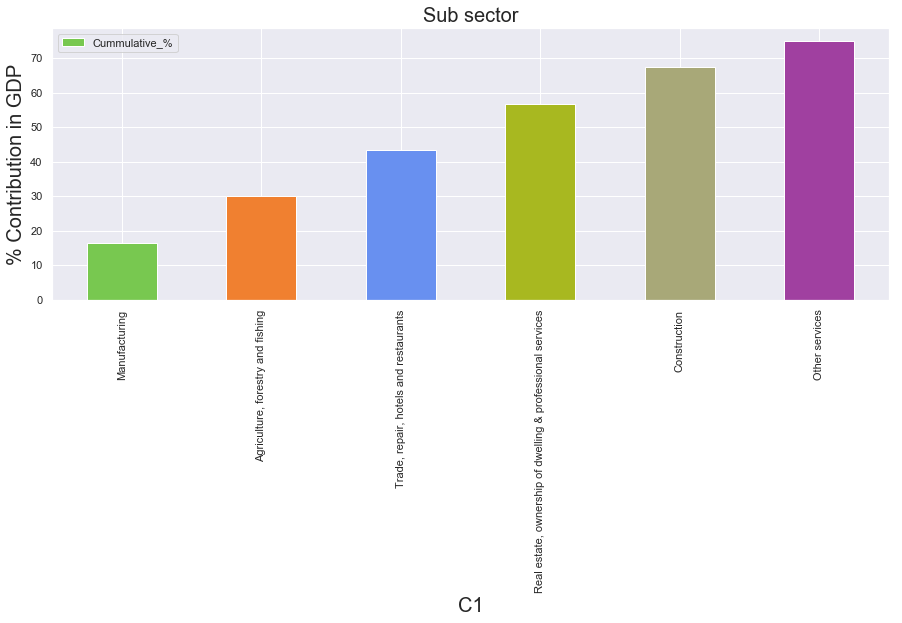

In [407]:
#Plotting graph for Category C1
Sub_category(df_C1,'C1')

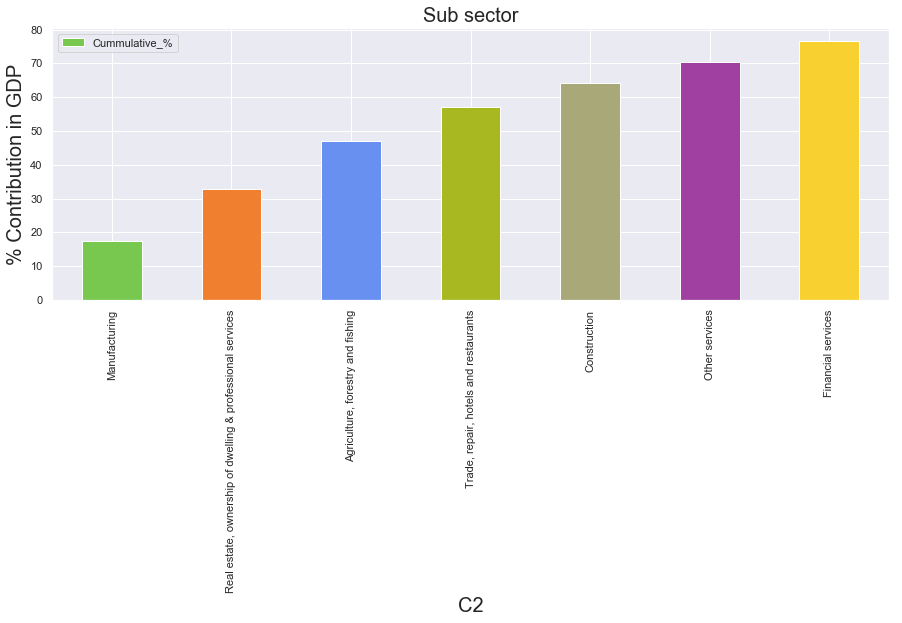

In [408]:
#Plotting graph for Category C2
Sub_category(df_C2,'C2')

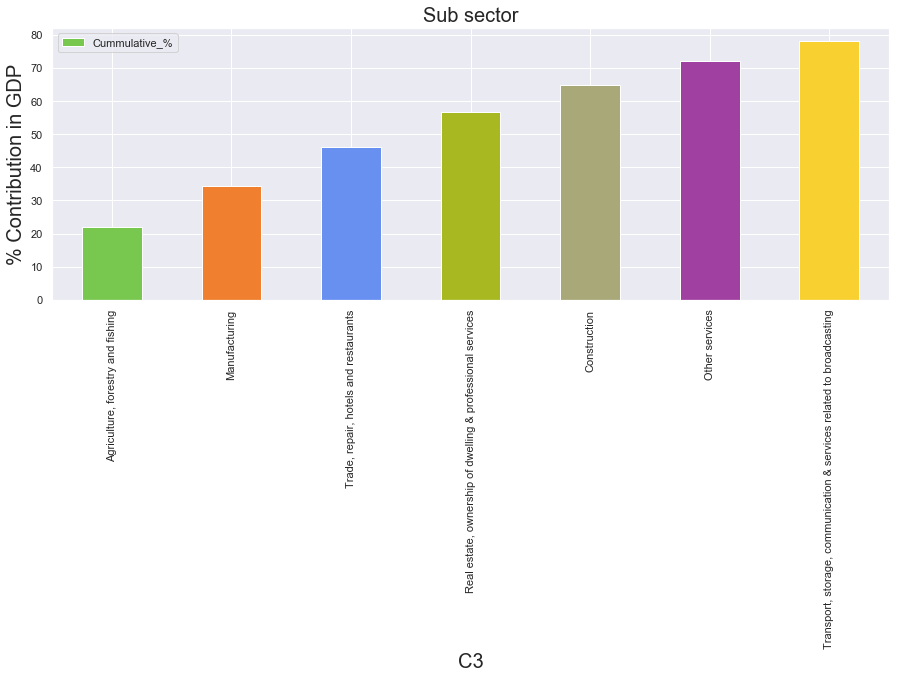

In [409]:
#Plotting graph for Category C3
Sub_category(df_C3,'C3')

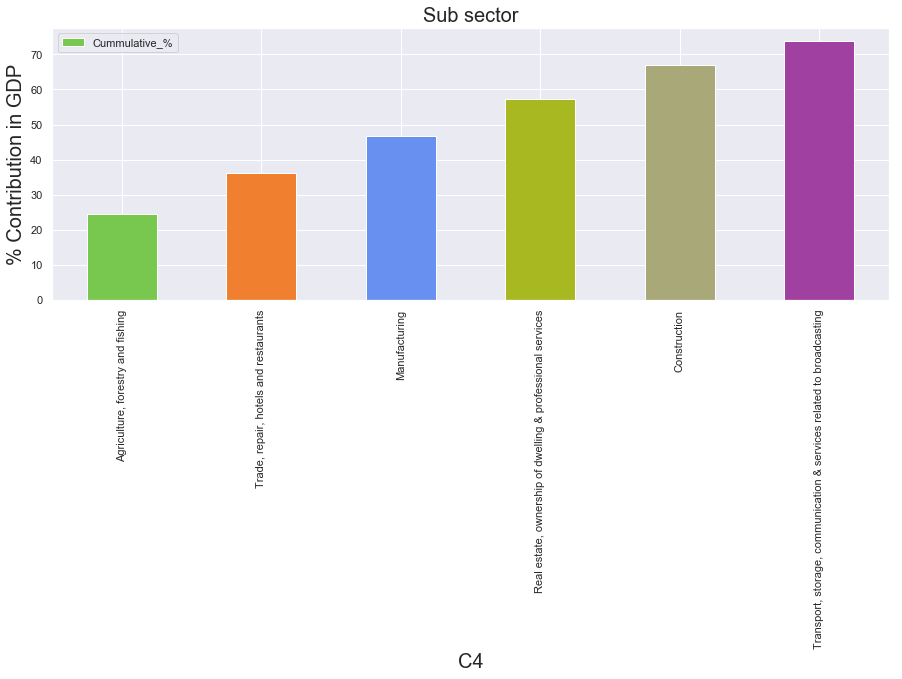

In [410]:
#Plotting graph for Category C4
Sub_category(df_C4,'C4')

Correlation of Primary and Per Capita GSDP (Rs.) 
                         Primary  Per Capita GSDP (Rs.)
Primary                1.000000              -0.518215
Per Capita GSDP (Rs.) -0.518215               1.000000


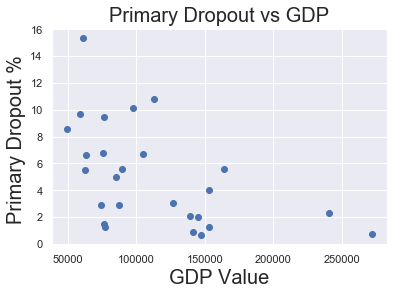

Correlation of Upper_Primary and Per Capita GSDP (Rs.) 
                        Upper_Primary  Per Capita GSDP (Rs.)
Upper_Primary               1.000000              -0.539449
Per Capita GSDP (Rs.)      -0.539449               1.000000


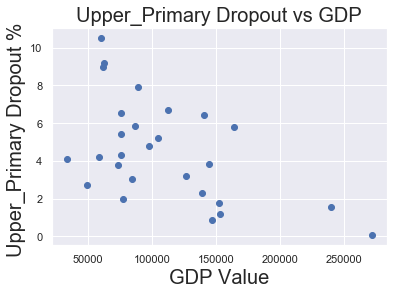

Correlation of Secondary and Per Capita GSDP (Rs.) 
                        Secondary  Per Capita GSDP (Rs.)
Secondary               1.000000              -0.455571
Per Capita GSDP (Rs.)  -0.455571               1.000000


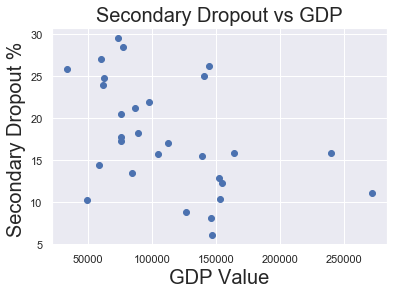

In [411]:
#Part-II: GDP and Education Dropout Rates

import seaborn as sns

#Reading Dropout CSV

df_drop_out=pd.read_csv('Data II.csv')

#Correcting the column name

df_drop_out.rename(columns={'Primary - 2014-2015':'Primary -2013-2014',
                          'Primary - 2014-2015.1':'Primary - 2014-2015'}, 
                 inplace=True)

#Filtering required column

df_drop_out=df_drop_out[['Level of Education - State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']]

#Renaming the columns
df_drop_out.rename(columns={'Level of Education - State':'State',
                            'Primary - 2014-2015':'Primary',
                          'Upper Primary - 2014-2015':'Upper_Primary',
                           'Secondary - 2014-2015':'Secondary'}, 
                 inplace=True)

#Filtering required column for Part 1-B dataset
df_All=df_All_required[['State','Per Capita GSDP (Rs.)']]


#Correcting the state name 
df_drop_out=df_drop_out.replace({'State' : { 'A & N Islands' : 'Andaman_Nicobar_Islands', 'Andhra Pradesh' : 'Andhra_Pradesh', 'Arunachal Pradesh' : 'Arunachal_Pradesh', 
                          'Chhatisgarh':'Chhattisgarh','Himachal Pradesh':'Himachal_Pradesh','Jammu and Kashmir':'Jammu_Kashmir','Madhya Pradesh':'Madhya_Pradesh','Tamil Nadu':'Tamil_Nadu',
                          'Uttrakhand':'Uttarakhand','Uttar Pradesh':'Uttar_Pradesh','West Bengal':'West_Bengal'
                          }})

#Merging Dropout and Part 1-B data based on state
mergedf = pd.merge(df_drop_out,df_All,how='outer',on='State')

#Data cleaning
mergedf = mergedf[mergedf['Per Capita GSDP (Rs.)'].notnull()]

mergedf['Per Capita GSDP (Rs.)'] = mergedf['Per Capita GSDP (Rs.)'].astype(np.float64)

mergedf=mergedf.sort_values(by=['Per Capita GSDP (Rs.)'],ascending=False).round(2)


#Creating dataframe for Primary
Primary_df=mergedf[['State','Primary','Per Capita GSDP (Rs.)']]
Primary_df = Primary_df[Primary_df['Primary'].notnull()]


#Calculating correlatin value for Primary and Per Capita GSDP (Rs.)
print('Correlation of Primary and Per Capita GSDP (Rs.) \n', Primary_df.corr())


#Plotting Scatter graph Primary vs Per Capita GSDP (Rs.)
plt.scatter( Primary_df['Per Capita GSDP (Rs.)'],Primary_df['Primary'])
plt.ylabel('Primary Dropout % ',fontsize=20)
plt.xlabel('GDP Value',fontsize=20)
plt.title('Primary Dropout vs GDP',fontsize=20)
plt.show()


#Creating dataframe for Upper_Primary

Upper_Primary_df=mergedf[['State','Upper_Primary','Per Capita GSDP (Rs.)']]
Upper_Primary_df = Upper_Primary_df[Upper_Primary_df['Upper_Primary'].notnull()]

#Calculating correlatin value for Upper_Primary and Per Capita GSDP (Rs.)
print('Correlation of Upper_Primary and Per Capita GSDP (Rs.) \n', Upper_Primary_df.corr())


#Plotting Scatter graph Upper_Primary vs Per Capita GSDP (Rs.)
plt.scatter(Upper_Primary_df['Per Capita GSDP (Rs.)'],Upper_Primary_df['Upper_Primary'])
plt.ylabel('Upper_Primary Dropout % ',fontsize=20)
plt.xlabel('GDP Value',fontsize=20)
plt.title('Upper_Primary Dropout vs GDP',fontsize=20)
plt.show()


#Creating dataframe for Secondary
Secondary_df=mergedf[['State','Secondary','Per Capita GSDP (Rs.)']]
Secondary_df = Secondary_df[Secondary_df['Secondary'].notnull()]


#Calculating correlatin value for Secondary and Per Capita GSDP (Rs.)
print('Correlation of Secondary and Per Capita GSDP (Rs.) \n', Secondary_df.corr())


#Plotting Scatter graph Secondary vs Per Capita GSDP (Rs.)
plt.scatter(Secondary_df['Per Capita GSDP (Rs.)'],Secondary_df['Secondary'])
plt.ylabel('Secondary Dropout % ',fontsize=20)
plt.xlabel('GDP Value',fontsize=20)
plt.title('Secondary Dropout vs GDP',fontsize=20)
plt.show()







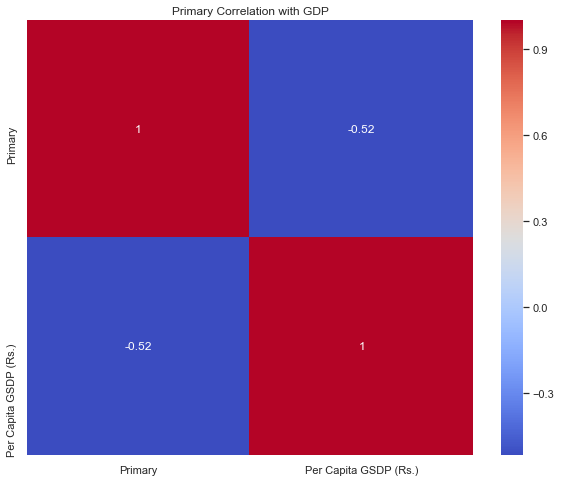

In [412]:
#Heatmap graph for Primary Correlation with GDP

plt.figure(figsize=(10,8))
sns.heatmap(Primary_df.corr(), cmap="coolwarm", annot=True).set_title("Primary Correlation with GDP")
plt.show()

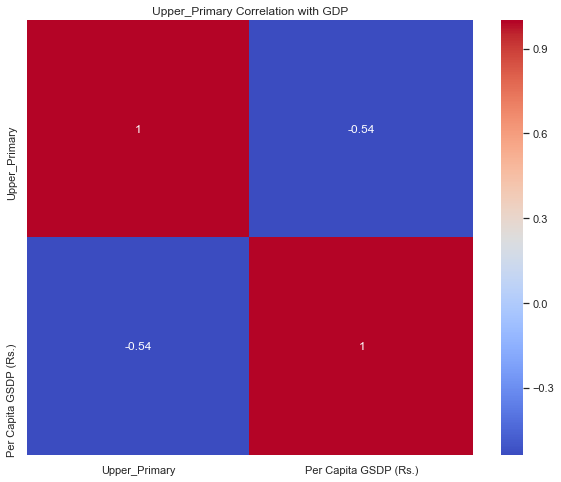

In [413]:
#Heatmap graph for Upper_Primary Correlation with GDP

plt.figure(figsize=(10,8))
sns.heatmap(Upper_Primary_df.corr(), cmap="coolwarm", annot=True).set_title("Upper_Primary Correlation with GDP")
plt.show()

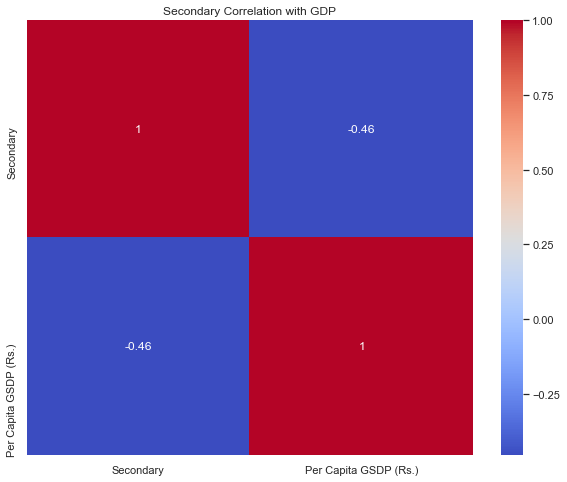

In [414]:
#Heatmap graph for Secondary Correlation with GDP

plt.figure(figsize=(10,8))
sns.heatmap(Secondary_df.corr(), cmap="coolwarm", annot=True).set_title("Secondary Correlation with GDP")
plt.show()